<a href="https://colab.research.google.com/github/josehenriqueprogramador/Jupyter_Analise_de_Dados/blob/master/crescjmento_populacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
from scipy.integrate import odeint

#Solução e ajuste de EDO com as rotinas odeint e curve_fit do Python - Ex.: Crescimento Populacional

Considerando que em 2017 a população da cidade x é de 1.000.000 de habitantes, determine a população desta cidade em 2040 considerando uma taxa de crescimento de o,o65% ao ano.

Optimal parameter is a=0.0649944


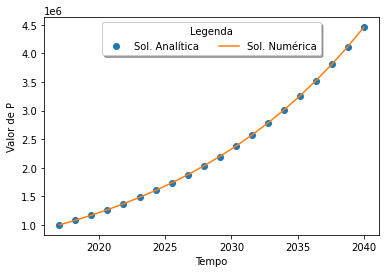

In [25]:
def f(p, t, a, b):
    """Função y=f(p,a,b) com parâmetros a,b. """
    return a * b * p 

def p(t, a, b, p0):
    """
    Solução para a EDO x'(t) = f(t,x,a,b) com condição inicial y(0) = y0
    """
    p = odeint(f, p0, t, args=(a, 1))
    return p.ravel()

p0 = 1e6  # Condição inicial em t = t0
t0 = 2017 
tf = 2040
n = 20    # Número de pontos para impressão 

# Solução analítica
data_t = np.linspace(t0,tf,n)
data_p = p0 * np.exp(0.065 * (data_t-t0)) 
# Adiciona ruído
yi = data_p + 1e3 * np.random.normal(size=len(data_t))

# Chamada da rotina curve_fit
from scipy.optimize import curve_fit
popt, pcov = curve_fit(p, data_t, yi)
a, b, x0 = popt
print("Optimal parameter is a=%g" % (a))
#print(data_p)

# Chamada da rotina matplotlib.pyplot
import matplotlib.pyplot as plt
t = np.linspace(t0, tf, n)
plt.plot(data_t, data_p,'o',label='Sol. Analítica')
plt.plot(t, p(t, a, b, p0), '-',label='Sol. Numérica')
plt.gcf().set_size_inches(6, 4)
plt.xlabel("Tempo")
plt.ylabel("Valor de P")
plt.legend(loc="upper center", ncol=2, shadow=True, title="Legenda")
plt.show()

#Solução e ajuste de EDO com as rotinas odeint e curve_fit do Python - Ex.: Crescimento Populacional